# Contenidos

1. Redes Neuronales Profundas (deep learning) `pytorch`.
2. Arquitectura de Transformer (encoder, decoder, encoder-decoder):
    - Embedding.
    - Positional Encoding.
    - Mecanismo de atencion.
    - Capas feedforward
3. Modelos pre-entrenados (transfer learning) `huggingface`.
    - `datasets`
    - `tokenizers`
    - `transformers`
4. Large language models (LLMs):
    - OpenAI.
    - HuggingFace.
    - GPT4All.
    - `langchain`
5. Applications:
    - `templates`.
    - `chains`.
    - `vector_store`.
    - `agents`.

In [1]:
import numpy as np
import torch # pytorch

In [2]:
x = np.array([
    [1, 2],
    [3, 4]
])

In [3]:
x

array([[1, 2],
       [3, 4]])

In [4]:
x = torch.tensor([
    [1, 2],
    [3, 4.],
])

In [5]:
x

tensor([[1., 2.],
        [3., 4.]])

In [6]:
x.dtype

torch.float32

In [7]:
x.sum()

tensor(10.)

In [8]:
x.mean()

tensor(2.5000)

In [9]:
x

tensor([[1., 2.],
        [3., 4.]])

In [10]:
x.T

tensor([[1., 3.],
        [2., 4.]])

In [11]:
x @ x

tensor([[ 7., 10.],
        [15., 22.]])

In [12]:
x = np.random.normal(size=(3, 3))
x

array([[ 0.44635965, -0.10106229, -1.21457133],
       [-1.01458923,  0.3050395 , -0.64699838],
       [-1.19228882,  1.08056887, -1.14352139]])

In [13]:
y = torch.randn(size=(3, 3))
y

tensor([[-1.5977,  0.7989, -0.6864],
        [-0.2869,  2.3841,  0.7768],
        [-0.4039, -0.8299, -1.5602]])

In [14]:
x.sum(axis=0)

array([-1.7605184 ,  1.28454608, -3.00509109])

In [15]:
y.sum(dim=0)

tensor([-2.2885,  2.3531, -1.4698])

In [16]:
y = torch.tensor(x)

In [17]:
y

tensor([[ 0.4464, -0.1011, -1.2146],
        [-1.0146,  0.3050, -0.6470],
        [-1.1923,  1.0806, -1.1435]], dtype=torch.float64)

In [18]:
y.numpy()

array([[ 0.44635965, -0.10106229, -1.21457133],
       [-1.01458923,  0.3050395 , -0.64699838],
       [-1.19228882,  1.08056887, -1.14352139]])

In [19]:
x = torch.randn(size=(1000, 1000))
x

tensor([[ 1.2761, -1.1033,  0.0098,  ...,  0.7333,  1.9459, -0.5038],
        [-1.5372, -1.3120,  0.4468,  ...,  0.7735, -0.1531,  0.3825],
        [-1.7839, -0.4485,  1.3958,  ..., -0.0561, -0.2842,  0.1051],
        ...,
        [ 0.3658, -0.2336, -0.6478,  ...,  1.2129, -1.8490, -1.0223],
        [-2.7551, -0.3752, -0.5340,  ..., -0.1880,  0.3688,  1.3237],
        [-1.4140,  0.2329,  0.1691,  ..., -0.0826,  0.0502, -1.0340]])

- CPU:

In [20]:
%%timeit
x @ x

62.6 ms ± 24.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


- GPU

In [21]:
y = x.to("cuda")

In [22]:
%%timeit
y @ y

540 µs ± 15.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [23]:
540 * (10 ** -3)

0.54

In [24]:
%%shell
wget 'https://s1.eestatic.com/2023/03/10/curiosidades/mascotas/747436034_231551832_1706x1280.jpg' -O cat.jpg

--2023-11-17 01:20:33--  https://s1.eestatic.com/2023/03/10/curiosidades/mascotas/747436034_231551832_1706x1280.jpg
Resolving s1.eestatic.com (s1.eestatic.com)... 138.199.8.193, 51.81.243.73, 2a02:6ea0:c806:1::4, ...
Connecting to s1.eestatic.com (s1.eestatic.com)|138.199.8.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87151 (85K) [image/jpeg]
Saving to: ‘cat.jpg’

cat.jpg             100%[===================>]  85.11K  --.-KB/s    in 0.06s   

2023-11-17 01:20:33 (1.33 MB/s) - ‘cat.jpg’ saved [87151/87151]



In [26]:
import cv2
import matplotlib.pyplot as plt

In [29]:
img = cv2.imread("cat.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

(-0.5, 1705.5, 1279.5, -0.5)

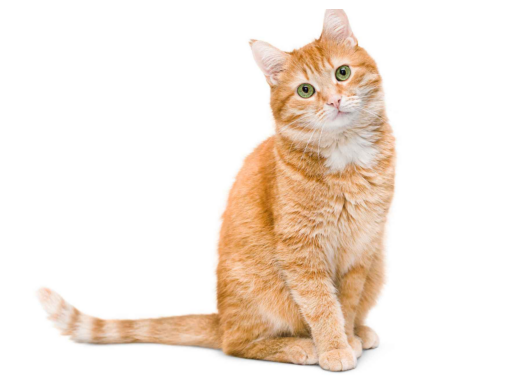

In [30]:
fig, ax = plt.subplots()
ax.imshow(img)
ax.axis("off")

In [31]:
type(img)

numpy.ndarray

In [32]:
img.dtype

dtype('uint8')

In [34]:
img_torch = torch.tensor(img)
type(img_torch)

torch.Tensor

In [35]:
img_torch_gpu = img_torch.to("cuda")

In [36]:
img_torch_gpu.device

device(type='cuda', index=0)

$$
f(x) = 2 x ^3 - 3 x ^ 2 + 3\\
\frac{df}{dx} = 6 x ^ 2 - 6x
$$

In [40]:
def f(x: torch.Tensor) -> torch.Tensor:
    return (
        2 * (x ** 3) -
        3 * (x ** 2) +
        3
    )

def df_dx(x: torch.Tensor) -> torch.Tensor:
    return (
        6 * (x ** 2) -
        6 * x
    )

In [41]:
x = torch.linspace(-3, 3, 1000)
y = f(x)
dy_dx = df_dx(x)

[Text(0.5, 0, '$x$'), Text(0, 0.5, '$f(x)$')]

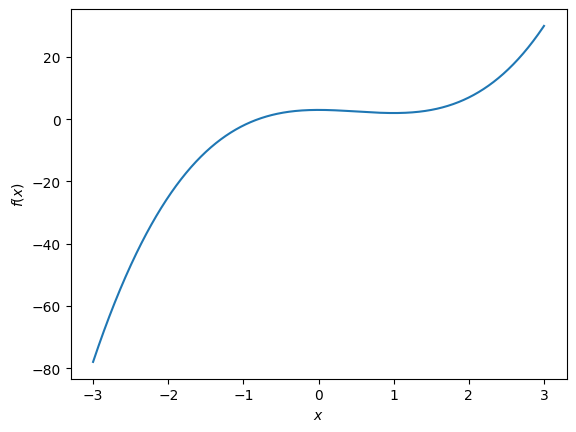

In [39]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set(xlabel="$x$", ylabel="$f(x)$")

[Text(0.5, 0, '$x$'), Text(0, 0.5, '$\\frac{df}{dx}$')]

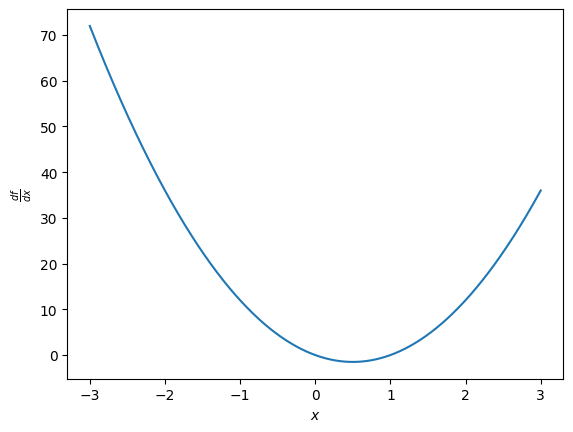

In [42]:
fig, ax = plt.subplots()
ax.plot(x, dy_dx)
ax.set(xlabel="$x$", ylabel=r"$\frac{df}{dx}$")

In [56]:
def df_dx(x: float) -> float:
    x_torch = torch.tensor(x, requires_grad=True)
    y = f(x_torch)
    y.backward()
    return float(x_torch.grad)

In [62]:
x = np.linspace(-3, 3, 1000)
dy_dx = list(map(df_dx, x))

[Text(0.5, 0, '$x$'), Text(0, 0.5, '$\\frac{df}{dx}$')]

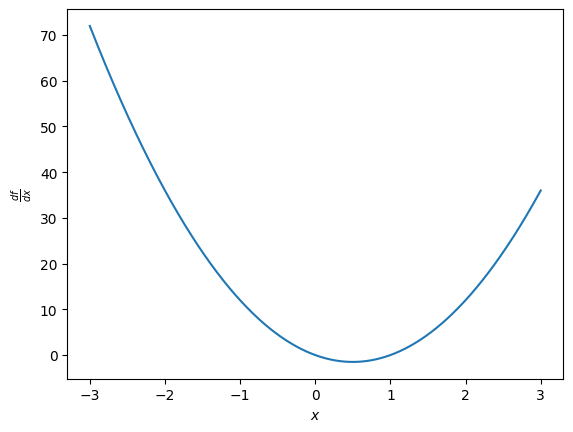

In [63]:
fig, ax = plt.subplots()
ax.plot(x, dy_dx)
ax.set(xlabel="$x$", ylabel=r"$\frac{df}{dx}$")

In [71]:
def f(x: torch.Tensor) -> torch.Tensor:
    return torch.exp(-1.0 * torch.abs(x)) * torch.cos(-5 * torch.abs(x))

In [72]:
x = torch.linspace(-3, 3, 1000)
y = f(x)

[Text(0.5, 0, '$x$'), Text(0, 0.5, '$f(x)$')]

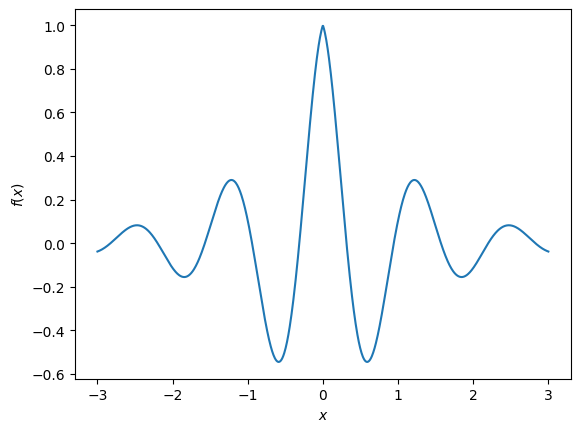

In [73]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set(xlabel="$x$", ylabel="$f(x)$")

In [74]:
def df_dx(x: float) -> float:
    x_torch = torch.tensor(x, requires_grad=True)
    y = f(x_torch)
    y.backward()
    return float(x_torch.grad)

In [75]:
x = np.linspace(-3, 3, 1000)
dy_dx = list(map(df_dx, x))

[Text(0.5, 0, '$x$'), Text(0, 0.5, '$\\frac{df}{dx}$')]

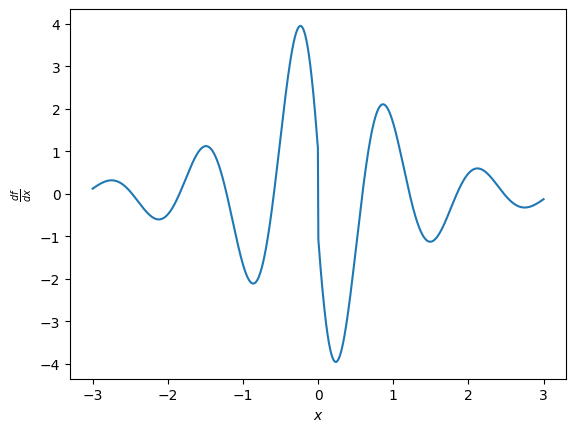

In [76]:
fig, ax = plt.subplots()
ax.plot(x, dy_dx)
ax.set(xlabel="$x$", ylabel=r"$\frac{df}{dx}$")

In [77]:
def df_dx(x: float) -> float:
    x_torch = torch.tensor(x, requires_grad=True, device="cuda")
    y = f(x_torch)
    y.backward()
    return float(x_torch.grad.to("cpu"))

In [78]:
x = np.linspace(-3, 3, 1000)
dy_dx = list(map(df_dx, x))

[Text(0.5, 0, '$x$'), Text(0, 0.5, '$\\frac{df}{dx}$')]

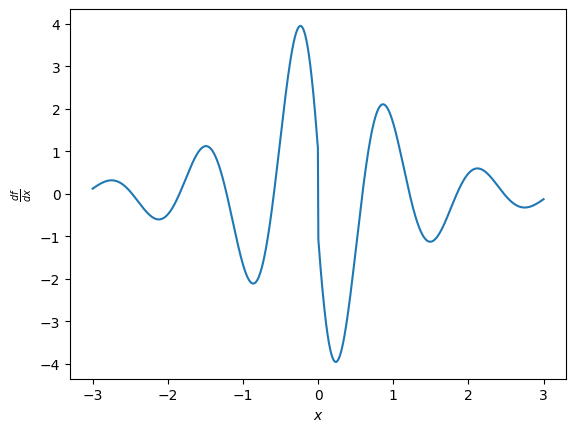

In [79]:
fig, ax = plt.subplots()
ax.plot(x, dy_dx)
ax.set(xlabel="$x$", ylabel=r"$\frac{df}{dx}$")

In [83]:
x = torch.randn(size=(2, 3)).to("cuda")

In [84]:
x.device

device(type='cuda', index=0)

In [85]:
device = torch.device(type="cuda", index=0)

In [86]:
x = torch.randn(size=(2, 2)).to(device)

In [87]:
x

tensor([[-0.4639, -0.2953],
        [ 0.3665,  0.8047]], device='cuda:0')